# Using Quarto for Stata dynamic documents

Let us consider an example where we study the **mpg** and **weight**
variables in **auto.dta**. In this example, all code used to construct
the desired output will be displayed as fenced block code, followed by
the output it produces. This is done using the option `*|echo: fenced`.
This option, however, doesnt seem to work well with jupyter notebooks.

We first use the **sysuse** command to load the dataset and then
describe the data using the **describe** command.

In [1]:
```{stata}
sysuse auto, clear
describe
```


(1978 automobile data)

Contains data from C:\Program Files\Stata17/ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2020 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %8.0g

Now, we want to check if **mpg** is always greater than 0 and less than
100. We use the **assert** command to perform the check. In this case,
we do not want to include any output in the target HTML file, so we use
the **quietly** attribute to modify the behavior of the **dd_do** Stata
dynamic tag.

In [2]:
```{stata}
 assert mpg > 0 & mpg < 100
```


If the data do not satisfy the conditions, **quatro** will fail with an
error message, which will occur if we run the same **assert** command in
a do-file.

Next, we want to summarize the **weight** variable:

In [3]:
```{stata}
summarize weight
```



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      weight |         74    3019.459    777.1936       1760       4840

We want to use the minimum and maximum values of **weight** in a
sentence. Instead of copying and pasting the numbers from the
**summarize** output, we can use the **`display`** Stata to show
**r(min)** and **r(max)** stored results. We will also use the options
`*| output: asis` to obtain text that follows markdown formatting.

```` markdown
```{stata}
*| output: asis
display "The variable weight has minimum value "  %4.2f `r(min)' " and " ///
         "has maximum value "   %4.2f `r(max)' "."
```
````

The variable weight has minimum value 1760.00 and has maximum value
4840.00.

In other words, if one wants to use dynamic tags, its possible to do so
by simply using display, with the corresponding locals, so Stata
evaluates the expressions as normal. `*| output: asis` is used so the
output can still be interpreted using markdown syntax.

As with **`dyndoc`**, display can also be used as a calculator. For
example, if we want to include the $range = max - min$ in a sentence,
instead of calculating the number and then copying and pasting it, we
can use

```` markdown
```{stata}
*| output: asis
display "The variable weight has range "  %4.2f `r(max)'-`r(min)' "."
```
````

The variable weight has range 3080.00.

Now, we want to graph **mpg** and **weight** using a scatterplot. There
are at least two ways to do this.

First, one can simply create the scatterplot using the same procedure as
before:

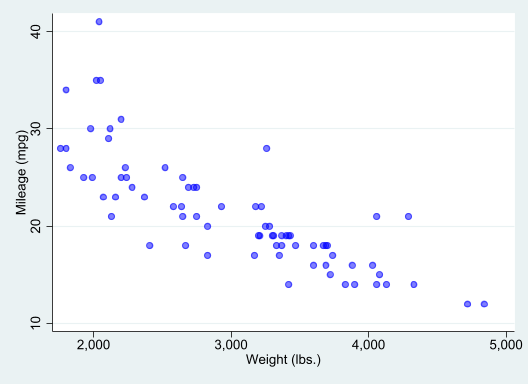

In [6]:
```{stata}
scatter mpg weight, mcolor(blue%50)
```


which generates a scatterplot of **mpg** and **weight** with 50% opacity
color markers.

Now, we want to export the graph to a file and include an image link to
the file.

In [7]:
```{stata}
qui:graph export fig1.png, width(1600) replace
```


This produces a graph of 1600 pixels width.

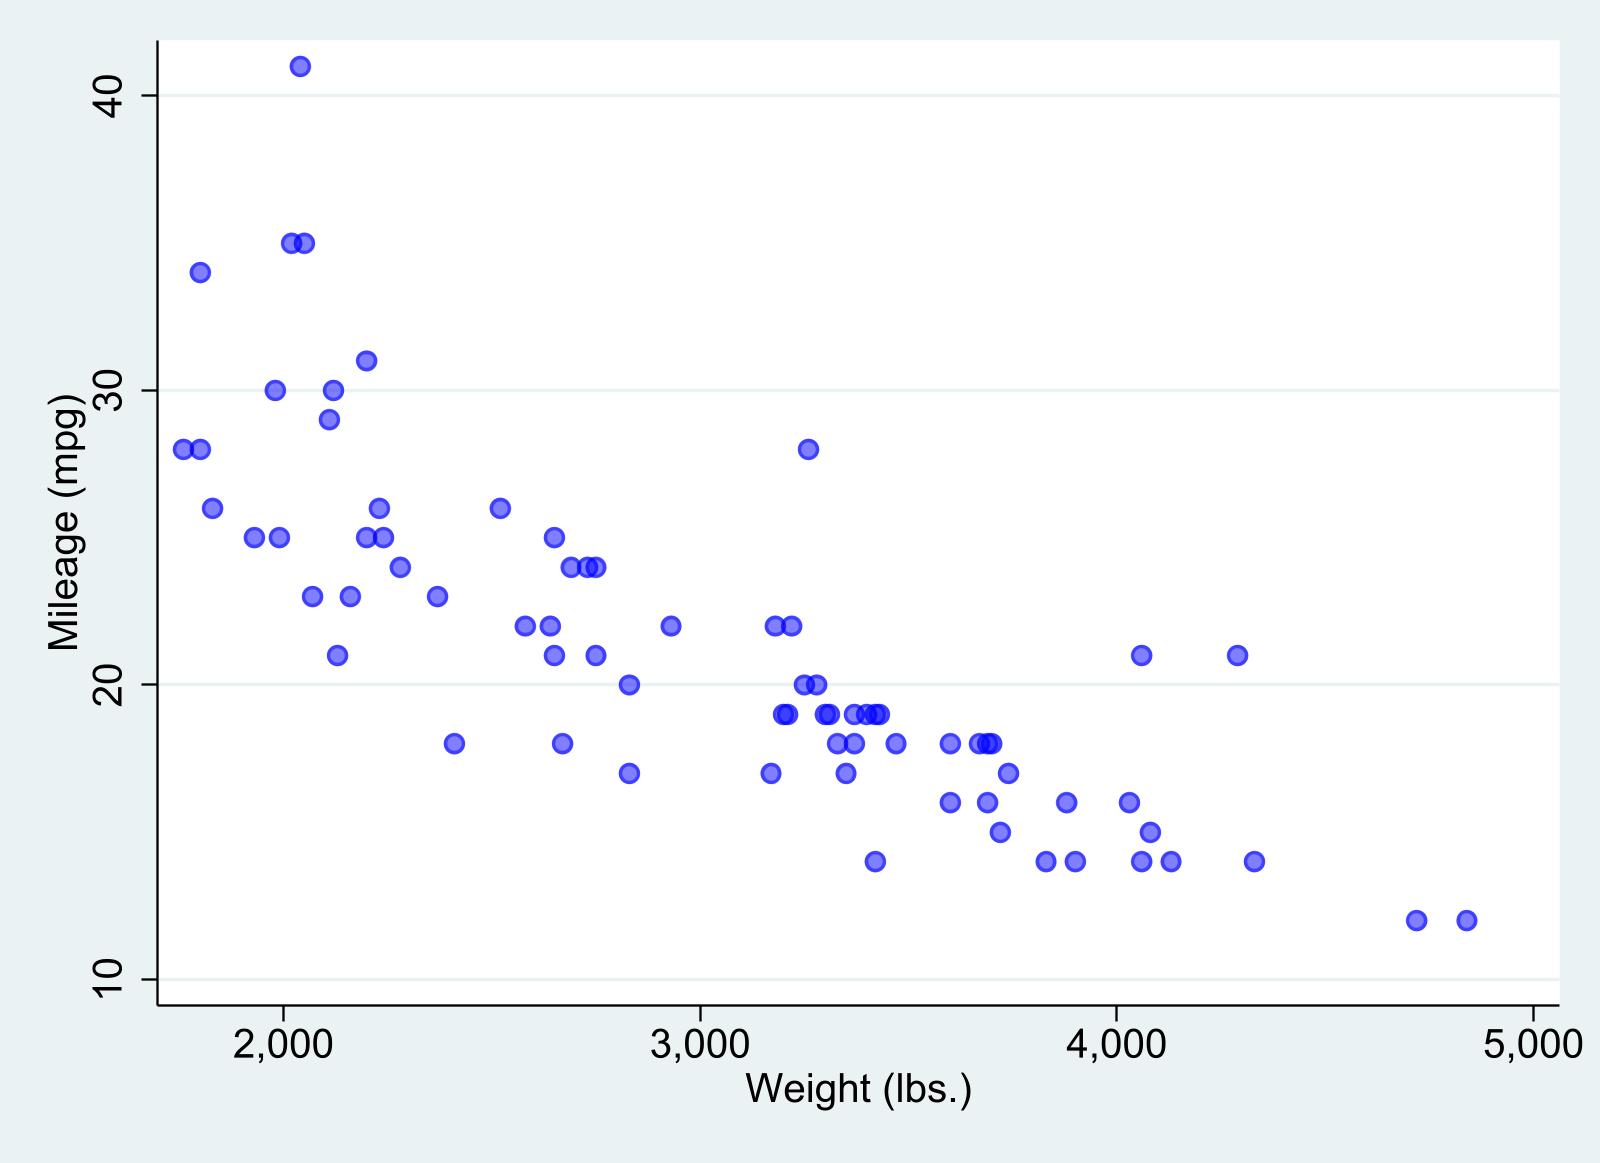

It is possible, however, to combine figure creation using quatro tags
and directives. Here, however, you need to make sure all figures are
named:

```` markdown
```{stata}
*| label: fig-cost
*| fig-cap: Price vs MPG
*| fig-subcap:
*|   - Foreign Cars
*|   - Domestic Cars
*| layout-ncol: 2
*| column: page

scatter price mpg if foreign==1, name(m1, replace) ylabel(0(4000)16000)
qui:graph export fig2a.png, width(1600) replace
scatter price mpg if foreign==0, name(m2, replace) ylabel(0(4000)16000)
qui:graph export fig2b.png, width(1600) replace
```
````

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div class="output display_data"
width="50.0%" data-layout-align="center">
<p>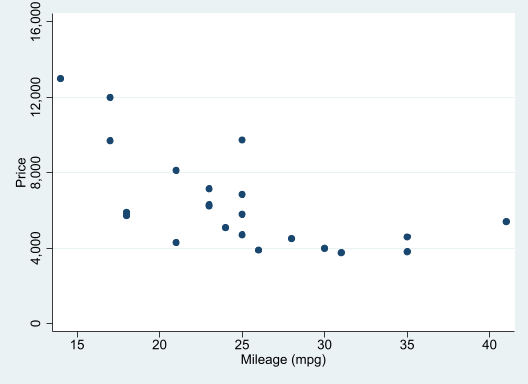</p>
</div></td>
<td style="text-align: center;"><div class="output display_data"
width="50.0%" data-layout-align="center">
<p>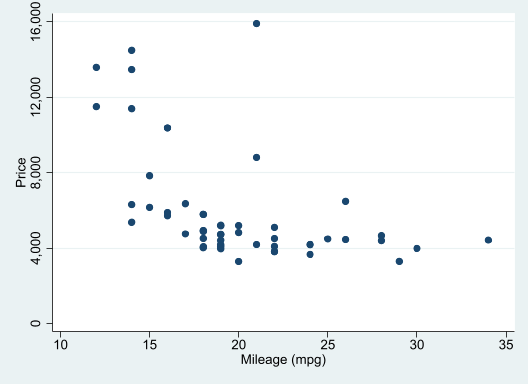</p>
</div></td>
</tr>
</tbody>
</table>

Figure 1: Price vs MPG

And of course, we can now the figure tags to link it to the text:

[Figure 1](#fig-cost) provides a simple scatter between prices and MPG
for foreign and domestic cars. While there seems to be a strong negative
relationship between these variables among foreign cars (see [Figure 1
(a)](#fig-cost-1)), the relationship among domestic cars is much weaker,
when looking at cars with a fuel efficiency larger than 15mpg (see
[Figure 1 (b)](#fig-cost-2)).

The last approach, however, may not work with PDF format, or
jupyter-notebook format, unless the figures are saved. But does seem to
work with HTML and docx.

Nevertheless, one could also do the following:

``` {markdown}
::: {#fig-mpgprice layout-ncol=2 .column-page }

![foreign](fig2a.png){#fig-mpgprice-1}

![domestic](fig2b.png){#fig-mpgprice-2}

Price vs MPG
:::
```

to produce

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="50.0%"
data-layout-align="center">
<p>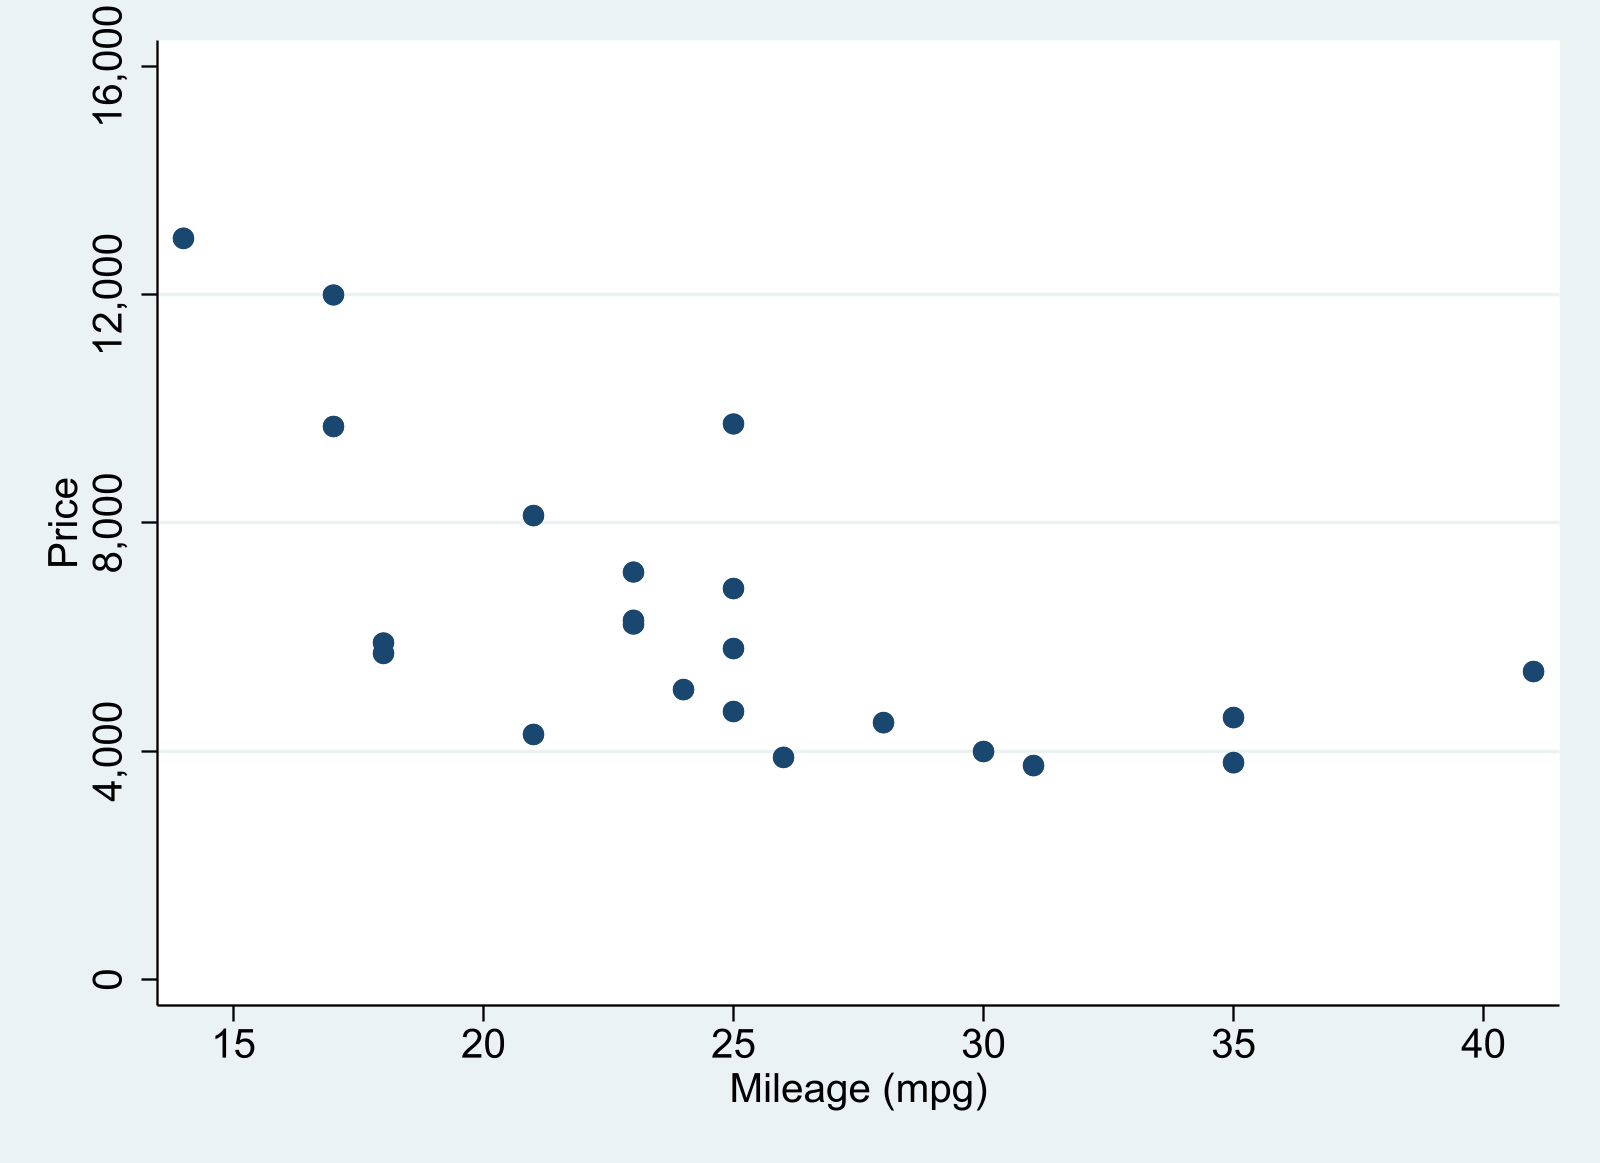</p>
</div></td>
<td style="text-align: center;"><div width="50.0%"
data-layout-align="center">
<p>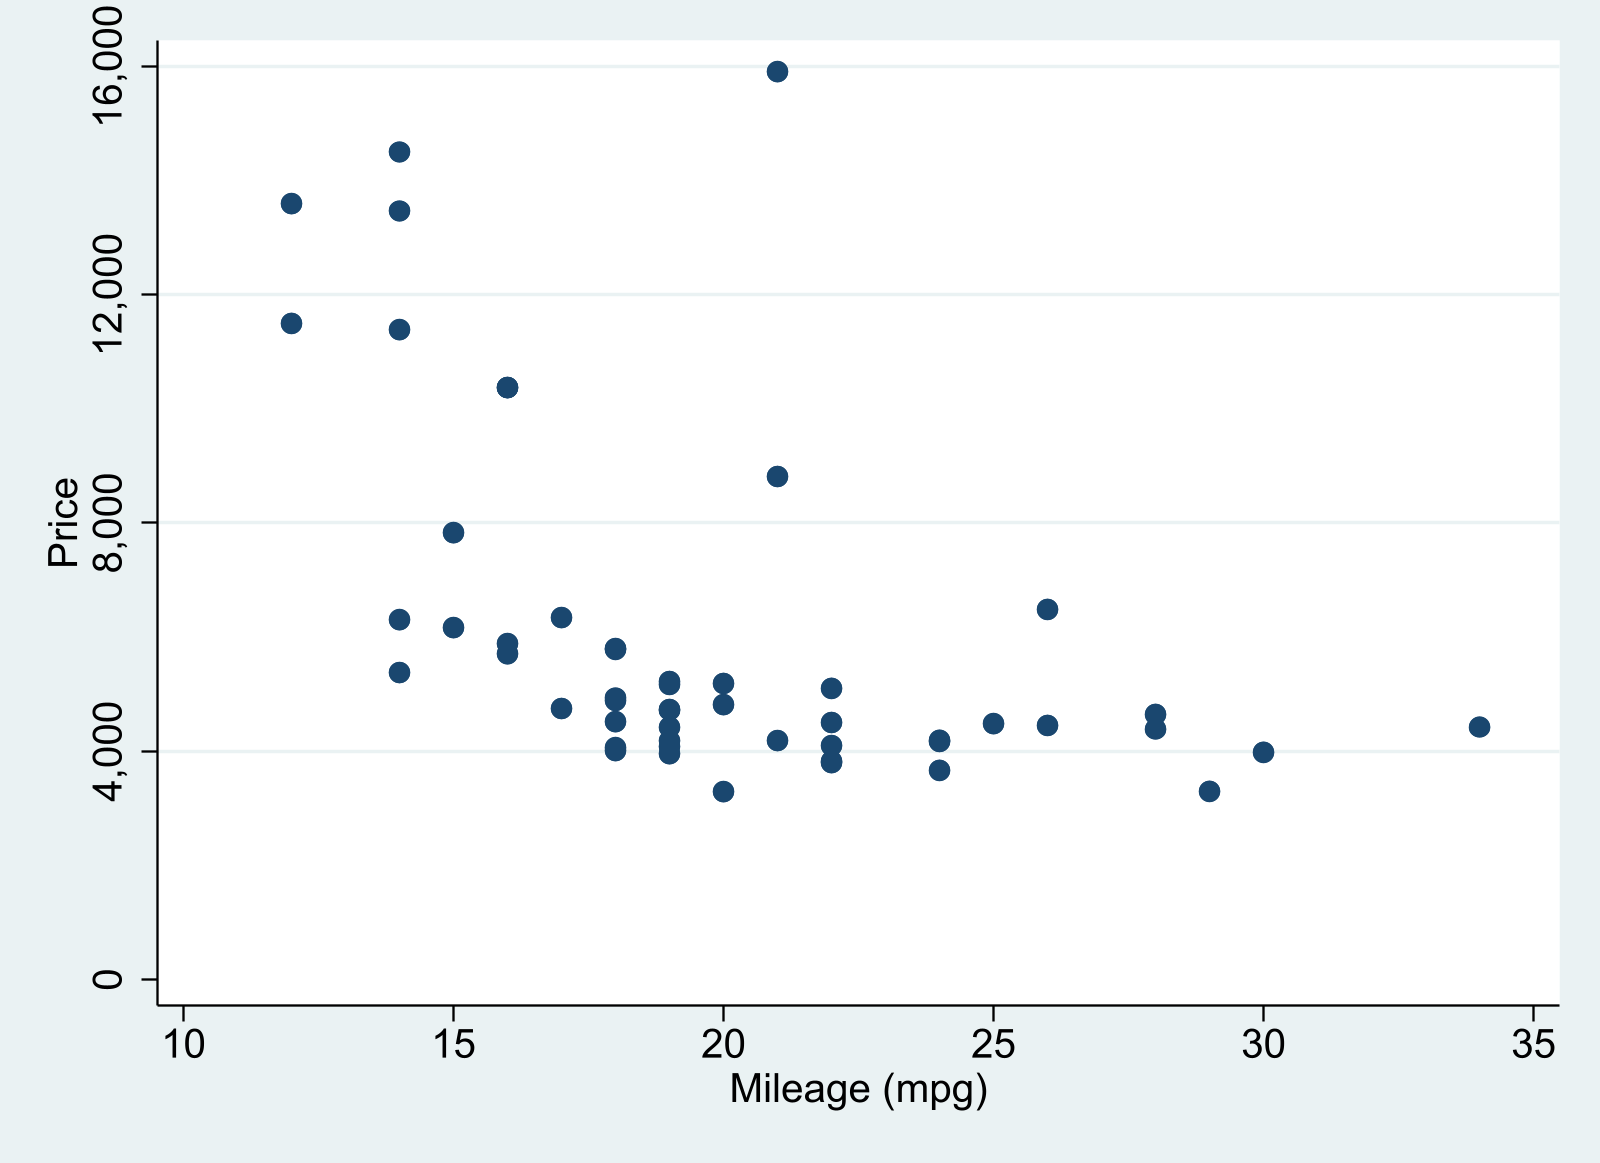</p>
</div></td>
</tr>
</tbody>
</table>

Figure 2: Price vs MPG

As plot in [Figure 2](#fig-mpgprice) provides a simple scatter between
prices and MPG for foreign and domestic cars. While there seems to be a
strong negative relationship between these variables among foreign cars
(see [Figure 2 (a)](#fig-mpgprice-1)), the relationship among domestic
cars is much weaker, when looking at cars with a fuel efficiency larger
than 15mpg (see [Figure 2 (b)](#fig-mpgprice-2)).

If using VScode, to render all formats at once, you need to type
`quarto render filename.qmd` in the terminal.

Just for fun, I also when rendering this with quatro, i used the
following formats


    ---
    format: 
      html: default
      pdf: default
      docx: default
      odt: default
      epub: default
    jupyter: nbstata
    ---